## Part II: Practical applications

### 2.1 K-means clustering 

In Python you can use the function KMeans() from the module sklearn.cluster to perform K-means clustering. To begin you will perform K-means with simulated data. Follow the steps:

(a) The simulated data will consist  in 50 observations described by two normal-distributed variables. In order to define classes in the data the first 25 observations have a mean shift relative to the next 25 observations.

In [22]:
import numpy   as   np
X  =  np.random.randn(50,2)
X[0:25, 0]  =  X[0:25, 0] + 3
X[0:25, 1]  =  X[0:25, 1] - 4

You can plot the observations and notice that there are two well separated clusters :

Text(0, 0.5, 'X2')

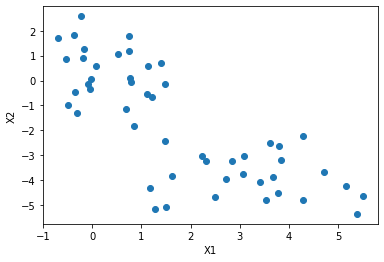

In [23]:
import matplotlib.pyplot as plt 
plt.plot(X[:, 0], X[:,1], "o")
plt.xlabel("X1")
plt.ylabel("X2")  

(b) Performs K-means clustering with K=2. Use the following command:

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 100).fit(X)

Then, the cluster assignments can be obtained by running print(kmeans.labels_). The final clusters centroids can be known using the command print(kmeans.cluster_centers_). 
In addition, you can plot the observations using a different color per cluster by running the following code:

Text(0, 0.5, 'X2')

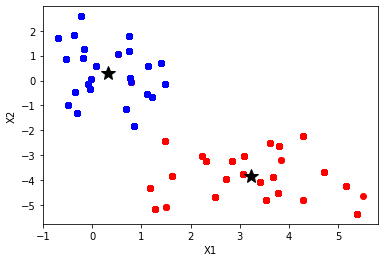

In [25]:
for i in range(0, X.shape[0]):
    if kmeans.labels_[i]==0:
        plt.plot(X[i:, 0], X[i:, 1], "o", color = "red")
    else:
        plt.plot(X[i:,0], X[i:,1], "o", color = "blue")
centroid1=kmeans.cluster_centers_[0]
centroid2=kmeans.cluster_centers_[1]
plt.plot(centroid1[0], centroid1[1], "*", color = "black", markersize = 15)
plt.plot(centroid2[0], centroid2[1], "*", color = "black", markersize = 15)
plt.xlabel("X1")
plt.ylabel("X2")

(c)Now, you are going to perform K−means with real data. The fileHCVdata.csv contains laboratory values of blood donors and Hepatitis C patients and demographic values like age. There are 12 variables, features 4-12 concern laboratory data (ALB, ALT, AST, BIL,CHE, CHOL, CREA, GGT and PROT ). 
Import the data set and get familiar with the data.
Answer the following questions :
 1. How many observations are there ? There are 567 observations.
 2. How many variables are there ?  There are 13 variables.
 3. What  type  of  variables  (numeric,  categorical) ?  For  each  categorical  variable  (if  any)give the number of levels and categories. You will denote the resulting dataframe objectdfHVC.

Let's read the data from the csv file and see the variables' data types.

In [41]:
import pandas as pd
dfHVC = pd.read_csv('HCVdata.csv', sep=';')
dfHVC.columns.tolist()

['Unnamed: 0',
 'Category',
 'Sex',
 'Age',
 'ALB',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT']

In [38]:
dfHVC.head(20)


,Unnamed: 0,Category,Sex,Age,ALB,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,m,32,38.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,m,32,38.5,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,m,32,46.9,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,m,32,43.2,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,m,32,39.2,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,7,0=Blood Donor,m,32,46.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
6,8,0=Blood Donor,m,32,42.2,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
7,9,0=Blood Donor,m,32,50.9,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
8,10,0=Blood Donor,m,32,42.4,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9
9,11,0=Blood Donor,m,32,44.3,21.7,22.4,17.2,4.15,3.57,78.0,24.1,75.4


In [37]:
dfHVC.tail(20)


,Unnamed: 0,Category,Sex,Age,ALB,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
547,595,3=Cirrhosis,m,51,33.0,4.5,66.6,91.0,4.02,4.08,75.9,28.5,62.3
548,596,3=Cirrhosis,m,56,27.0,17.0,319.8,37.0,1.42,3.54,66.9,93.7,65.3
549,597,3=Cirrhosis,m,56,23.0,5.1,123.0,43.0,1.80,2.40,62.7,35.9,62.8
550,598,3=Cirrhosis,m,56,30.0,0.9,80.3,119.0,1.88,1.43,79.3,17.6,54.2
551,599,3=Cirrhosis,m,58,31.0,7.0,181.8,58.0,3.29,3.92,66.4,273.7,78.1
552,600,3=Cirrhosis,m,59,36.0,5.2,110.1,37.0,2.29,3.68,118.2,56.9,74.8
553,601,3=Cirrhosis,m,59,27.0,4.0,65.2,209.0,2.47,3.61,71.7,28.5,60.6
554,602,3=Cirrhosis,m,59,31.0,5.4,95.4,117.0,1.57,3.51,60.5,53.6,68.5
555,603,3=Cirrhosis,m,61,39.0,27.3,143.2,15.0,5.38,4.88,72.3,400.3,73.4
556,605,3=Cirrhosis,m,74,23.0,2.1,90.4,22.0,2.50,3.29,51.0,46.8,57.1


In [ ]:
dfHVC.dtypes


In [36]:
dfHVC['Sex'] = dfHVC['Sex'].astype('category');
dfHVC['Category'] = dfHVC['Category'].astype('category');


(d) Since all the clustering approaches used in this lab are based upon distancesor  dissimilarity  measures,  it  is  strongly  recommended  to  scale  the  variables  previously.  The following code allows to scale all the variables in a dataframe called dfHVC :


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfHVC_scaled = scaler.fit_transform(dfHVC)

ValueError: could not convert string to float: '0=Blood Donor'

Create a dataframe containing all the numeric variables after being scaled, you will name theresulting outputdfHVC_scaled.